In [1]:
import os
import sys

sys.path.append("../")


In [2]:
from sapsan.lib.backends.fake import FakeExperimentBackend
from sapsan.lib.backends.mlflow import MlFlowExperimentBackend
from sapsan.lib.data.jhtdb_dataset import JHTDB128Dataset
from sapsan.lib.data import Equidistance3dSampling
from sapsan.lib.estimator import Spacial3dEncoderNetworkEstimator, Spacial3dEncoderNetworkEstimatorConfiguration
from sapsan.lib.experiments.evaluation_3d import Evaluation3dExperiment
from sapsan.lib.experiments.training import TrainingExperiment


In [5]:
os.environ["AWS_ACCESS_KEY_ID"] = "<AWS_ACCESS_KEY_ID>"
os.environ["AWS_SECRET_ACCESS_KEY"] = "<AWS_SECRET_ACCESS_KEY>"

def run():
    MLFLOW_BACKEND_HOST = "mlflow"
    MLFLOW_BACKEND_PORT = 9000
    dataset_root_dir = "./data/u_dim32_fm15.h5"
    CHECKPOINT_DATA_SIZE = 32
    SAMPLE_TO = 16
    GRID_SIZE = 8
    features = ['u']
    labels = ['tn']

    sampler = Equidistance3dSampling(CHECKPOINT_DATA_SIZE, SAMPLE_TO)

    experiment_name = "CNN experiment"

    estimator = Spacial3dEncoderNetworkEstimator(
        config=Spacial3dEncoderNetworkEstimatorConfiguration(n_epochs=1, grid_dim=GRID_SIZE)
    )

    tracking_backend = FakeExperimentBackend(experiment_name)
    # tracking_backend = MlFlowExperimentBackend(experiment_name, MLFLOW_BACKEND_HOST, MLFLOW_BACKEND_PORT)

    x, y = JHTDB128Dataset(path=dataset_root_dir,
                           features=features,
                           target=labels,
                           checkpoints=[0, 4, 10],
                           grid_size=GRID_SIZE,
                           checkpoint_data_size=CHECKPOINT_DATA_SIZE,
                           sampler=sampler).load()

    training_experiment = TrainingExperiment(name=experiment_name,
                                             backend=tracking_backend,
                                             model=estimator,
                                             inputs=x, targets=y)
    training_experiment.run()

    x, y = JHTDB128Dataset(path=dataset_root_dir,
                           features=features,
                           target=labels,
                           checkpoints=[0],
                           grid_size=GRID_SIZE,
                           checkpoint_data_size=CHECKPOINT_DATA_SIZE,
                           sampler=sampler).load()

    evaluation_experiment = Evaluation3dExperiment(name=experiment_name,
                                                   backend=tracking_backend,
                                                   model=training_experiment.model,
                                                   inputs=x, targets=y,
                                                   grid_size=GRID_SIZE,
                                                   checkpoint_data_size=SAMPLE_TO)

    evaluation_experiment.run()


<IPython.core.display.Javascript object>

[2020-04-27 19:38:42,826] 
1/1 * Epoch 1 (train): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=1126.8932 | _timers/batch_time=0.0100 | _timers/data_time=0.0075 | _timers/model_time=0.0024 | loss=0.0110
1/1 * Epoch 1 (valid): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=1067.6761 | _timers/batch_time=0.0128 | _timers/data_time=0.0102 | _timers/model_time=0.0025 | loss=0.0099
Top best models:
logs/checkpoints/train.1.pth	0.0099


INFO:metrics_logger:
1/1 * Epoch 1 (train): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=1126.8932 | _timers/batch_time=0.0100 | _timers/data_time=0.0075 | _timers/model_time=0.0024 | loss=0.0110
1/1 * Epoch 1 (valid): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=1067.6761 | _timers/batch_time=0.0128 | _timers/data_time=0.0102 | _timers/model_time=0.0025 | loss=0.0099
/Users/icekhan/Documents/development/myprojects/sapsan/repo/Sapsan/sapsan/utils/plot.py:23: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



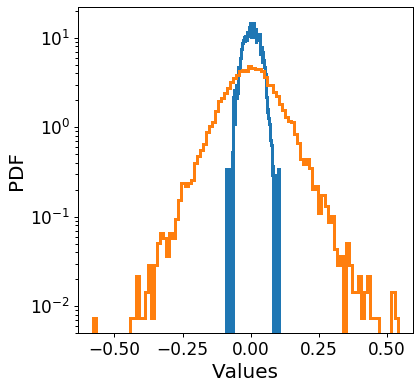

<Figure size 432x432 with 0 Axes>

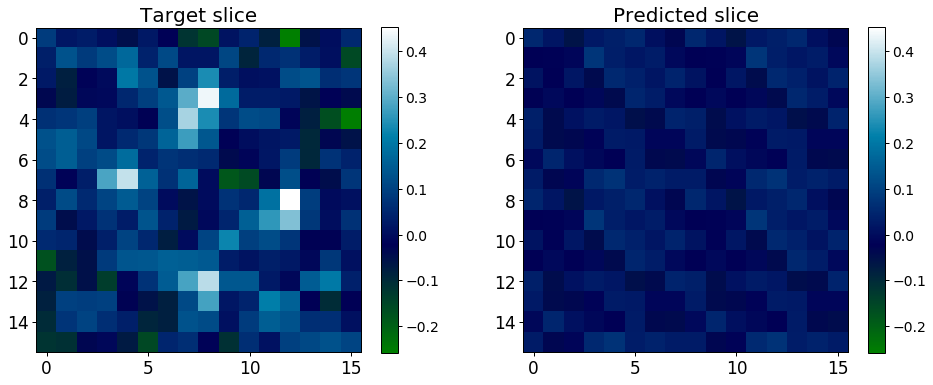

In [6]:
run()